In [1]:
# Import pandas, math, numpy and matplotlib libraries
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
%matplotlib inline

In [2]:
# suppress warnings (to clear up the notebook)
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the hipparcos star astronomy catalog: (European Space Agency's astrometric satellite , Hipparcos)
hipparcos_df = pd.read_csv("hipparcos.csv")

In [4]:
# view the first five entries of the dataframe
hipparcos_df.head()

,Catalog,HIP,Proxy,RAhms,DEdms,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,...,Survey,Chart,Notes,HD,BD,CoD,CPD,(V-I)red,SpType,r_SpType
0,H,1,NaN,00 00 00.22,+01 05 20.4,9.10,NaN,H,0.000912,1.089013,...,S,NaN,NaN,224700.0,B+00 5077,NaN,NaN,0.66,F5,S
1,H,2,NaN,00 00 00.91,-19 29 55.8,9.27,NaN,G,0.003797,-19.498837,...,NaN,NaN,NaN,224690.0,B-20 6688,NaN,NaN,1.04,K3V,4
2,H,3,NaN,00 00 01.20,+38 51 33.4,6.61,NaN,G,0.005008,38.859286,...,S,NaN,NaN,224699.0,B+38 5108,NaN,NaN,0.00,B9,S
3,H,4,NaN,00 00 02.01,-51 53 36.8,8.06,NaN,H,0.008382,-51.893546,...,S,NaN,NaN,224707.0,NaN,NaN,P-52 12237,0.43,F0V,2
4,H,5,NaN,00 00 02.39,-40 35 28.4,8.55,NaN,H,0.009965,-40.591224,...,NaN,NaN,NaN,224705.0,NaN,C-41 15372,P-41 9991,0.95,G8III,2


In [5]:
# create a subset of the required columns, Vmag, B-V, Plx, r_Vmag
hipp_df = hipparcos_df[['Vmag', 'Plx', 'r_Vmag', 'B-V']]
hipp_df

,Vmag,Plx,r_Vmag,B-V
0,9.10,3.54,H,0.482
1,9.27,21.90,G,0.999
2,6.61,2.81,G,-0.019
3,8.06,7.75,H,0.370
4,8.55,2.87,H,0.902
...,...,...,...,...
118213,6.99,1.92,H,1.595
118214,8.23,10.63,G,0.639
118215,7.59,5.00,H,0.999
118216,9.20,19.22,G,0.698


In [6]:
# remove rows containing NaN values from the dataframe
hipp_clean = hipp_df.dropna()

In [7]:
# Calculate the absolute magnitudes using vectorized operations
hr_diagrams_data = pd.DataFrame({
    'Vmag': hipp_clean['Vmag'],
    'Plx': hipp_clean['Plx'],
    'r_Vmag': hipp_clean['r_Vmag'],
    'B-V': hipp_clean['B-V'],
    'Mv': hipp_clean['Vmag'] + 5 * np.log10(hipp_clean['Plx']/10)
})

# Calculate the luminosity using the absolute magnitudes
hr_diagrams_data['Luminosity'] = 10 ** ((4.83 - hr_diagrams_data['Mv']) / 2.5)

In [8]:
# view the first five entries of the final dataframe
hr_diagrams_data.head()

,Vmag,Plx,r_Vmag,B-V,Mv,Luminosity
0,9.10,3.54,H,0.482,6.845016,0.156312
1,9.27,21.90,G,0.999,10.972221,0.003492
2,6.61,2.81,G,-0.019,3.853532,2.458031
3,8.06,7.75,H,0.370,7.506509,0.084996
4,8.55,2.87,H,0.902,5.839409,0.394672


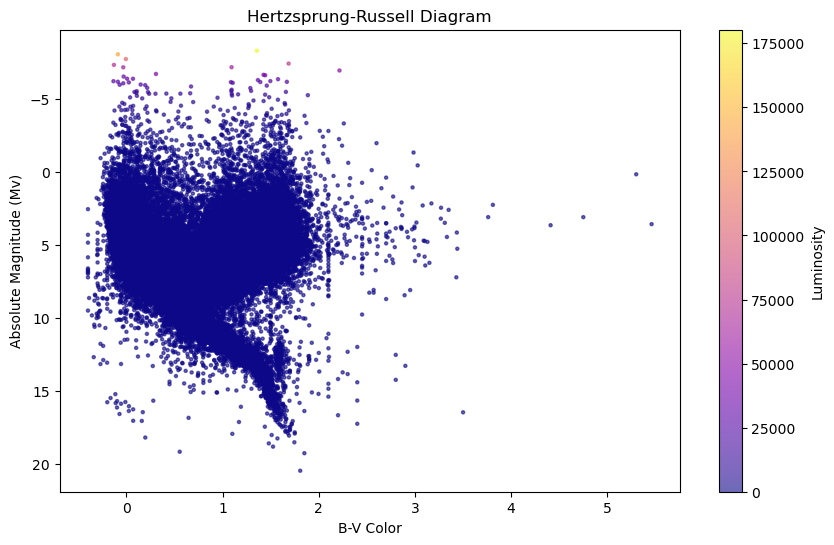

In [11]:
# create a scatter plot of the HR diagram
plt.figure(figsize=(10, 6))
plt.scatter(hr_diagrams_data['B-V'], hr_diagrams_data['Mv'], c=hr_diagrams_data['Luminosity'], cmap='plasma', alpha=0.6, s=5)

# set plot labels and title
plt.xlabel('B-V Colour')
plt.ylabel('Absolute Magnitude (Mv)')
plt.title('Hertzsprung-Russell Diagram')

# add a colorbar to indicate luminosity
cbar = plt.colorbar()
cbar.set_label('Luminosity')

# invert the y-axis to show brighter stars at the top
plt.gca().invert_yaxis()

# Show the plot
plt.show()